# TPP09

Finalising my answer to the driving question: What are the trends across the week (such as weekdays versus weekends)?


In [1]:
# import all the required libraries and the data, then change into correct datatypes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.api.types import CategoricalDtype
import seaborn as sns

dataset_path = Path('../../../datasets')
raw_data_p1 = pd.read_csv(dataset_path / 'Participant-01.csv')
p1 = raw_data_p1.copy()

p1['Start'] = pd.to_datetime(p1['Start'])
p1['Finish'] = pd.to_datetime(p1['Finish'])
p1['Week Day'] = p1['Start'].dt.day_name()
p1['Month'] = p1['Start'].dt.month_name()
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
p1['Week Day'] = p1['Week Day'].astype(cat_type)
p1

,Start,Finish,Steps (count),Week Day,Month
0,2021-12-31 23:00:00,2022-01-01 00:00:00,0.000000,Friday,December
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000,Saturday,January
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000,Saturday,January
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000,Saturday,January
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000,Saturday,January
...,...,...,...,...,...
5862,2022-09-02 04:00:00,2022-09-02 05:00:00,9.000000,Friday,September
5863,2022-09-02 05:00:00,2022-09-02 06:00:00,0.000000,Friday,September
5864,2022-09-02 06:00:00,2022-09-02 07:00:00,410.584935,Friday,September
5865,2022-09-02 07:00:00,2022-09-02 08:00:00,1153.415065,Friday,September


In [2]:
# import datasets for rainfall and sun
dataset_path = Path('../../../datasets/additional')
raw_data = pd.read_csv(dataset_path / 'rainfall_syd.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sydrain = raw_data.copy()

dataset_path = Path('../../../datasets/additional')
raw_data2 = pd.read_csv(dataset_path / 'solar_cent_park.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sun = raw_data2.copy()

In [3]:
sydrain['Date'] = pd.to_datetime(sydrain['Date'])
sun['Date'] = pd.to_datetime(sun['Date'])
sydrain['Month'] = sydrain['Date'].dt.month_name()
sydrain['Week Day'] = sydrain['Date'].dt.day_name()
sun['Month'] = sun['Date'].dt.month_name()
sun['Week Day'] = sun['Date'].dt.day_name()
sydrain['Week Day'] = sydrain['Week Day'].astype(cat_type)
sun['Week Day'] = sun['Week Day'].astype(cat_type)

Group by dates first

In [4]:
p1['Date'] = p1['Start'].dt.date

In [5]:
p1

,Start,Finish,Steps (count),Week Day,Month,Date
0,2021-12-31 23:00:00,2022-01-01 00:00:00,0.000000,Friday,December,2021-12-31
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000,Saturday,January,2022-01-01
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000,Saturday,January,2022-01-01
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000,Saturday,January,2022-01-01
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000,Saturday,January,2022-01-01
...,...,...,...,...,...,...
5862,2022-09-02 04:00:00,2022-09-02 05:00:00,9.000000,Friday,September,2022-09-02
5863,2022-09-02 05:00:00,2022-09-02 06:00:00,0.000000,Friday,September,2022-09-02
5864,2022-09-02 06:00:00,2022-09-02 07:00:00,410.584935,Friday,September,2022-09-02
5865,2022-09-02 07:00:00,2022-09-02 08:00:00,1153.415065,Friday,September,2022-09-02


In [6]:
day = p1.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day

,Date,Steps (count),Week Day,Month
0,2021-12-31,0.000000,Friday,December
1,2022-01-01,11609.000000,Saturday,January
2,2022-01-02,10337.000000,Sunday,January
3,2022-01-03,6310.000000,Monday,January
4,2022-01-04,14395.000000,Tuesday,January
...,...,...,...,...
241,2022-08-29,8332.918443,Monday,August
242,2022-08-30,8834.000000,Tuesday,August
243,2022-08-31,14871.000000,Wednesday,August
244,2022-09-01,14604.000000,Thursday,September


Make graph that compares the sum of the number of steps made for each day of the week with the average number of steps made for each day of the week.

Text(0.5, 1.0, 'Average daily steps by weekday')

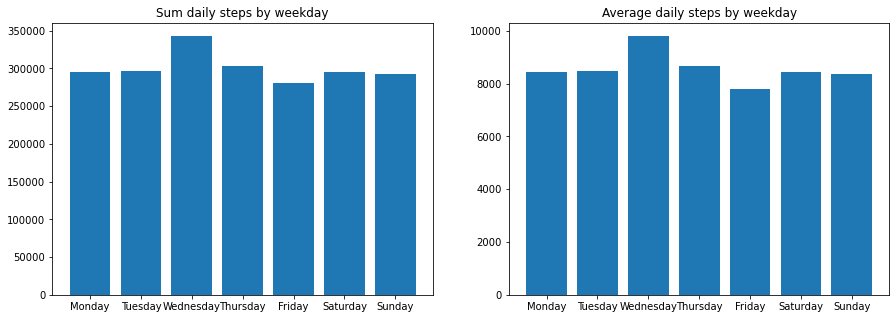

In [7]:
week_count = day.groupby(['Week Day'])['Steps (count)'].sum()
week_avg = day.groupby(['Week Day'])['Steps (count)'].mean()
plt.rcParams["figure.figsize"] = (15,5)

fig, axs = plt.subplots(1, 2)
axs[0].bar(cats, week_count)
axs[0].set_title('Sum daily steps by weekday')

axs[1].bar(cats, week_avg)
axs[1].set_title('Average daily steps by weekday')

From the two bar plots, we can see that Wednesday has the highest total and average step count for Participant 1 and that Friday in comparision to other days of the week has a slightly lower total and average step count. The step patterns for all other days of the week is pretty similiar. An explaination for this pattern may be this paticipant has a daily routine that is pretty similar for everyday of the week except Wednesdays, where they may have an additional activity on that day.

theory to explain trend.
 The mid-week slump can be partially attributed to feeling like your days and your work have become monotonous. If you continuously fall into the same routine, use Wednesdays as a day to switch it up at work. Try something new, take on a new task, or eat lunch with someone that you don't normally eat with.

## Sub Question

Day of the week activity over the months

In [8]:
cat2 = ['December','January','February','March','April','May','June','July','August','September']
cat2_type = CategoricalDtype(categories=cat2, ordered=True)
day['Month'] = day['Month'].astype(cat2_type)
week_month_count = day.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean','Date':'first'}).reset_index()
week_month_count

,Month,Week Day,Steps (count),Date
0,December,Monday,NaN,NaN
1,December,Tuesday,NaN,NaN
2,December,Wednesday,NaN,NaN
3,December,Thursday,NaN,NaN
4,December,Friday,0.0,2021-12-31
...,...,...,...,...
65,September,Wednesday,NaN,NaN
66,September,Thursday,14604.0,2022-09-01
67,September,Friday,1574.0,2022-09-02
68,September,Saturday,NaN,NaN


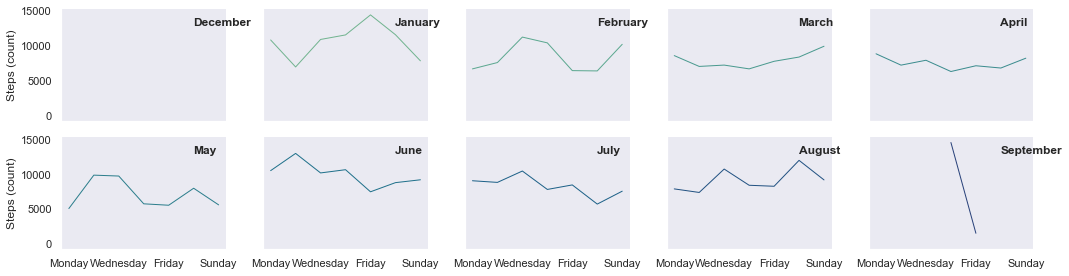

In [9]:

import seaborn as sns

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=week_month_count,
    x="Week Day", y="Steps (count)", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=5, height=2, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Steps (count)")
g.tight_layout()


December and Spetember has less than a week worth of data therefore the graphs does not show any trends that we can use. Looking to see if there is any trends for monthly days of the week, Monday for all months have around 10000 total steps, Tuesday generally have a small drop from monday in step count for all months except february, May and June were May and June has a very visible increase. Wednesday step count increases compared to tuesday except for June. Thursday shows an decrease from wednesday for all months except January and June. Friday, Saturday, Sunday the trend compared to their previous day is inconsistant for each month, however Friday for January is quite high incomparision to other months in step count.

An explaination for some trends in this data; Thursday shows a decrease in step count compared to Wednesday, may be due to Wednesday being a day that typically has higher activity therefore resulting in a change in mindset for Thursday, making them more likely to 'lay back' or 'relax' for the day therefore resulting in a lower step count. 

Overall the trend for days of the week, there is not really an great difference between weekday and weekend step counts as besides for Wednesday which has a higher step count, all other days of the week has has similiar step counts.

Maping the trends with a heatmap

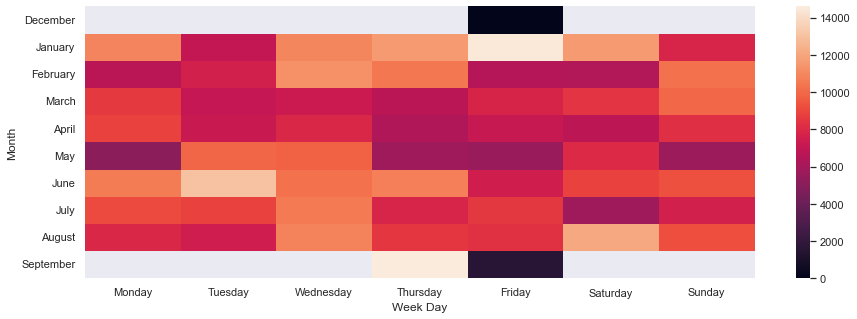

In [10]:
import seaborn as sns
import numpy as np


week_month_count = day.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean'}).reset_index()
week_month_count
week_month_count = week_month_count.pivot("Month", "Week Day", "Steps (count)")
# flights = sns.load_dataset("flights")
# flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(week_month_count)

We can see from the heat may that Wednesday, has in most months has the highest step count. There is a general trend that the steps reduce after wednesday. March and April appears to have a slope in the step count in comparison to other months.

## Sub Question 2

Does weather conditions such as rainfall and amount of sun impact the number of steps made in a week.

<BarContainer object of 7 artists>

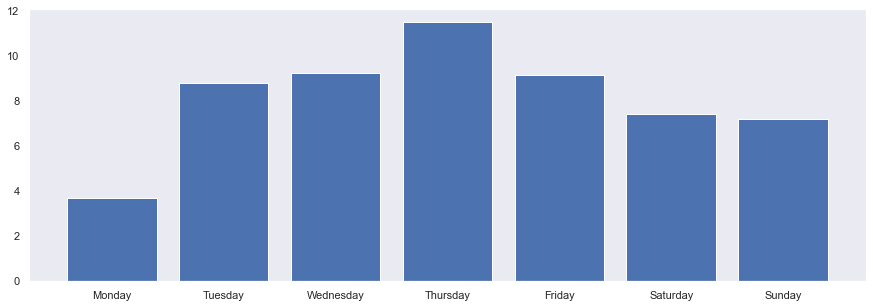

In [11]:
rain_count = sydrain.groupby(['Week Day'])['Rainfall amount (millimetres)'].mean().reset_index()
rain_count
plt.bar(rain_count['Week Day'],rain_count['Rainfall amount (millimetres)'])

Text(0.5, 1.0, 'Monthly Average Rainfall for Days of the Week')

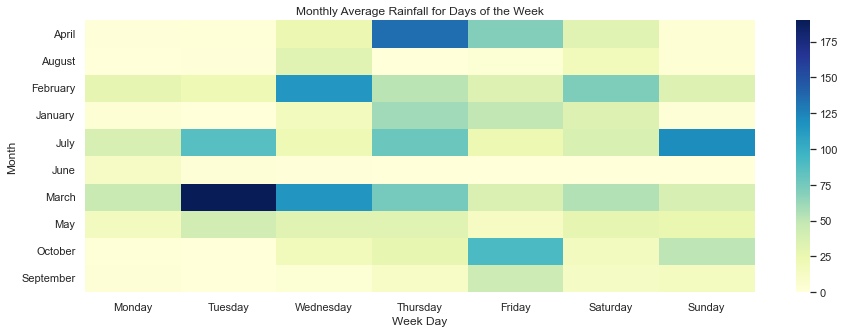

In [12]:
# first group the required data
week_month_count3 = sydrain.groupby(['Month','Week Day']).agg({'Rainfall amount (millimetres)': 'sum'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count3 = week_month_count3.pivot("Month", "Week Day", "Rainfall amount (millimetres)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count3,cmap='YlGnBu')
ax.set_title('Monthly Average Rainfall for Days of the Week')

In [16]:
t = day.copy()
t['Date'] = pd.to_datetime(t['Date'])
t = pd.merge(t,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
t

,Date,Steps (count),Week Day,Month,Rainfall amount (millimetres)
0,2021-12-31,0.000000,Friday,December,NaN
1,2022-01-01,11609.000000,Saturday,January,0.0
2,2022-01-02,10337.000000,Sunday,January,0.0
3,2022-01-03,6310.000000,Monday,January,0.0
4,2022-01-04,14395.000000,Tuesday,January,0.0
...,...,...,...,...,...
241,2022-08-29,8332.918443,Monday,August,0.0
242,2022-08-30,8834.000000,Tuesday,August,0.4
243,2022-08-31,14871.000000,Wednesday,August,0.0
244,2022-09-01,14604.000000,Thursday,September,0.2


<BarContainer object of 7 artists>

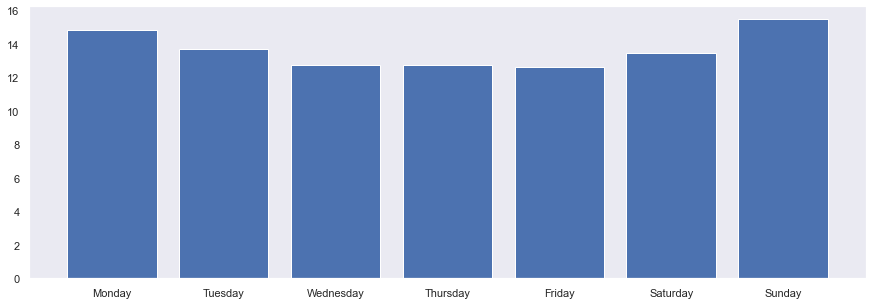

In [17]:
sun_count = sun.groupby(['Week Day'])['Daily global solar exposure (MJ/m*m)'].mean().reset_index()
# sun_count
plt.bar(sun_count['Week Day'],sun_count['Daily global solar exposure (MJ/m*m)'])

Text(0.5, 1.0, 'Monthly Average Sunlight for Days of the Week')

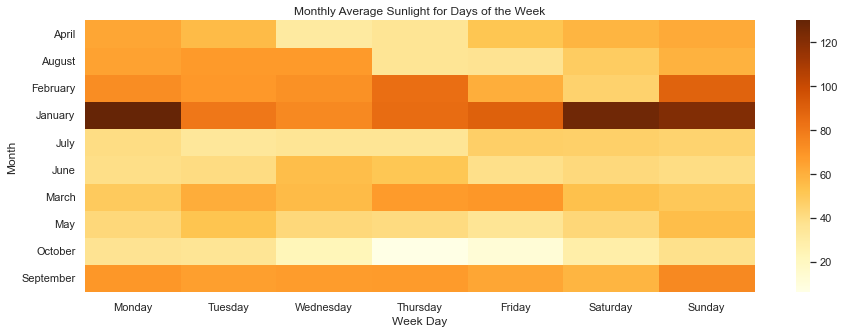

In [18]:
# first group the required data
week_month_count4 = sun.groupby(['Month','Week Day']).agg({'Daily global solar exposure (MJ/m*m)': 'sum'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count4 = week_month_count4.pivot("Month", "Week Day", "Daily global solar exposure (MJ/m*m)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count4, cmap='YlOrBr')
ax.set_title('Monthly Average Sunlight for Days of the Week')

In [19]:
t2 = pd.merge(t,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
t2

,Date,Steps (count),Week Day,Month,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
0,2021-12-31,0.000000,Friday,December,NaN,NaN
1,2022-01-01,11609.000000,Saturday,January,0.0,27.6
2,2022-01-02,10337.000000,Sunday,January,0.0,31.9
3,2022-01-03,6310.000000,Monday,January,0.0,31.6
4,2022-01-04,14395.000000,Tuesday,January,0.0,28.6
...,...,...,...,...,...,...
241,2022-08-29,8332.918443,Monday,August,0.0,11.9
242,2022-08-30,8834.000000,Tuesday,August,0.4,16.0
243,2022-08-31,14871.000000,Wednesday,August,0.0,14.7
244,2022-09-01,14604.000000,Thursday,September,0.2,13.3


In [20]:
t2.corr()

,Steps (count),Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
Steps (count),1.000000,-0.109879,0.295710
Rainfall amount (millimetres),-0.109879,1.000000,-0.260581
Daily global solar exposure (MJ/m*m),0.295710,-0.260581,1.000000
